In [3]:
import os
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from googletrans import Translator
from sklearn.svm import SVC
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
!pip install torch torchvision
!pip install googletrans==4.0.0-rc1

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tarfile

# Ruta al archivo tar.gz en Google Drive
ruta_archivo = '/content/drive/MyDrive/Inteligencia Artificial/aclImdb_v1.tar.gz'

# Ruta donde los archivos seran descomprimidos
ruta_extraido = '/content/dataset'

# Descomprimir el archivo tar.gz para poder acceder
with tarfile.open(ruta_archivo, 'r:gz') as tar:
    tar.extractall(ruta_extraido)

In [6]:
# Verificar si hay una GPU disponible o en su defecto usar cpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Dispositivo seleccionado:", device)

Dispositivo seleccionado: cuda


In [7]:
# Ruta donde los archivos son descomprimidos
ruta_extraido = '/content/dataset'

# Leemos las reseñas y etiquetas
def read_reviews_and_labels(directory):
    reviews = []
    labels = []
    for sentiment in ['pos', 'neg']:
        sentiment_dir = os.path.join(directory, sentiment)
        for file in os.listdir(sentiment_dir):
            with open(os.path.join(sentiment_dir, file), 'r') as f:
                review = f.read()
                reviews.append(review)
                labels.append(1 if sentiment == 'pos' else 0)
    return reviews, labels

train_dir = os.path.join(ruta_extraido, 'aclImdb/train')
test_dir = os.path.join(ruta_extraido, 'aclImdb/test')

# Leemos las reseñas de entrenamiento y prueba junto con sus etiquetas
train_reviews, train_labels = read_reviews_and_labels(train_dir)
test_reviews, test_labels = read_reviews_and_labels(test_dir)

# Preprocesamiento de las reseñas, limpiamos y convertimos a minúsculas
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)       # Eliminar etiquetas HTML
    text = re.sub(r'\S+@\S+', '', text)       # Eliminar direcciones de correo electrónico
    text = re.sub(r'https?://\S+', '', text)  # Eliminar URLs
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios en blanco adicionales
    return text

# Aplicamos el preprocesamiento a las reseñas de entrenamiento y prueba
train_reviews = [preprocess_text(review) for review in train_reviews]
test_reviews = [preprocess_text(review) for review in test_reviews]

# Extraemos características utilizando TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_reviews)
X_test = vectorizer.transform(test_reviews)

# Dividimos el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, train_labels, test_size=0.2, random_state=42)

# Entrenamos un modelo de clasificación SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entrenamos el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Evaluamos el rendimiento del modelo SVM en el conjunto de validación
y_pred_val = svm_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print(f'Precisión en el conjunto de validación: {accuracy_val*100:.2f}%')

# Evaluamos el rendimiento del modelo SVM en el conjunto de prueba
y_pred_test = svm_model.predict(X_test)
accuracy_test = accuracy_score(test_labels, y_pred_test)
print(f'Precisión en el conjunto de prueba: {accuracy_test*100:.2f}%')

Precisión en el conjunto de validación: 89.16%
Precisión en el conjunto de prueba: 87.86%


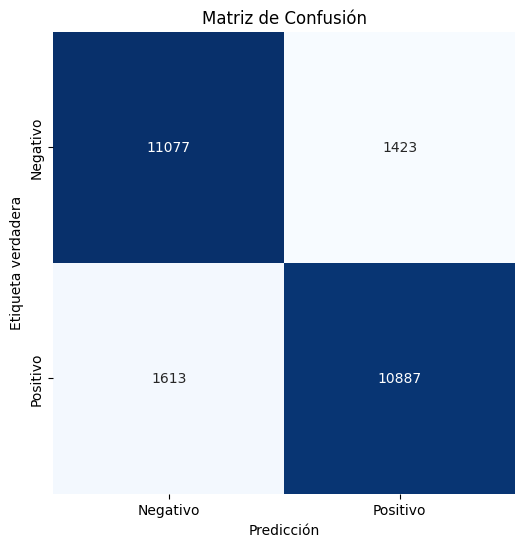

In [8]:
# Matriz de confusión
cm = confusion_matrix(test_labels, y_pred_test)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión')
plt.show()

In [9]:
# Reporte de clasificación
classification_rep = classification_report(test_labels, y_pred_test)
print("Reporte de Clasificación:")
print(classification_rep)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.88      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [23]:
# Obtener un comentario aleatorio, su etiqueta ("Esta reseña es positiva", "Esta reseña es negativa") y el nombre del archivo
def get_random_comment_and_label(directory, labels):
    sentiment = random.choice(['pos', 'neg'])
    sentiment_dir = os.path.join(directory, sentiment)
    file = random.choice(os.listdir(sentiment_dir))
    file_path = os.path.join(sentiment_dir, file)

    with open(file_path, 'r') as f:
        comment = f.read()

    label = "Esta reseña es positiva" if sentiment == 'pos' else "Esta reseña es negativa"
    return comment, label, file

# Ruta donde se descomprimirán los archivos
extracted_path = '/content/dataset'

# Traducir un texto al español
def translate_to_spanish(text):
    translator = Translator()
    translated_text = translator.translate(text, src='en', dest='es').text
    return translated_text

# Leemos las reseñas y etiquetas
def read_reviews_and_labels(directory):
    pass

# Obtenemos un comentario aleatorio del conjunto de prueba y su etiqueta
random_comment_test, random_label_test, random_file_test = get_random_comment_and_label(test_dir, test_labels)

# Preprocesamos el comentario de la misma manera que se preprocesaron las reseñas de entrenamiento
preprocessed_random_comment_test = preprocess_text(random_comment_test)

# Traducimos el comentario al español
translated_comment_test = translate_to_spanish(preprocessed_random_comment_test)

# Transformamos el comentario en un vector TF-IDF utilizando el mismo vectorizador utilizado en el entrenamiento
random_comment_vector_test = vectorizer.transform([preprocessed_random_comment_test])

# Hacemos la predicción utilizando el modelo SVM entrenado
predicted_sentiment_test = svm_model.predict(random_comment_vector_test)

# El resultado de la predicción será un valor 0 o 1, donde 0 representa una reseña negativa y 1 representa una reseña positiva
if predicted_sentiment_test[0] == 0:
    predicted_label_test = "Esta reseña es negativa"
else:
    predicted_label_test = "Esta reseña es positiva"

# Mostrar el comentario original, su traducción al español, el nombre del archivo del comentario y el resto de la información
print("Comentario original del conjunto de prueba: ", random_comment_test)
print("Traducción al español del comentario elegido: ", translated_comment_test)
print("Nombre del archivo del comentario: ", random_file_test)
print("Etiqueta original del conjunto de prueba: ", random_label_test)
print("Predicción del modelo para el conjunto de prueba: ", predicted_label_test)

Comentario original del conjunto de prueba:  The Coen Brothers have truly outdone themselves in this wonderful saga of three escaped convicts. Though it is based on "The Odyssey," the ancient work of Homer, you do not have to have read "The Odyssey" to be able to follow the story. The brothers Coen have woven a tapestry of celluloid and aural delights! The soundtrack is intrinsic to the film, indeed it is as though the soundtrack is the product and the film is wrapping paper. Each character is wonderfully exploited and harkens back to the days of old when films were rich with character actors whose very appearance in the film adds richness, texture and authenticity. George Clooney is magnificent as the grease haired Everett Ulysses McGill, a honest con on the run whose pompous linguistics and vocabulary are comical and endearing. O Brother, Where Art Thou is easily the best Coen film to date as well as Clooney's best effort. Clooney is good enough to warrant a best actor nomination as 